## Tiempo Libre Medio

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 

In [10]:
File = "EnergiaPotencialGas2D.txt"
Data = np.loadtxt(File)

In [11]:
Energy = Data[:,1]
Position_on_time = Data[:,0]
Middle_value = np.mean(Data[:,1])
Energy -= Middle_value

In [13]:
X = np.fft.fft(Energy)
Xmag = np.abs(X)
freq = np.fft.fftfreq(len(Energy))

In [14]:
mask_1 = freq < 0
X[mask_1] = 0

In [15]:
Max = np.argmax(Xmag)
f = freq[Max]
steps = 1/f

In [16]:
mask_2 = freq != f
X[mask_2] = 0
Reverse = np.fft.ifft(X)

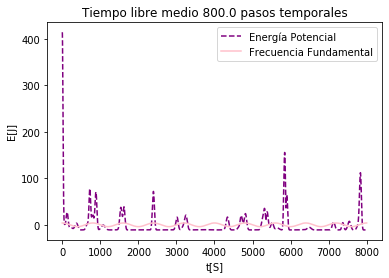

In [22]:
plt.title(f"Tiempo libre medio {round(steps,2)} pasos temporales")
plt.plot(Position_on_time*1000,Energy,"--", label="Energía Potencial",color="purple")
plt.plot(Position_on_time*1000,np.real(Reverse),label="Frecuencia Fundamental",color="pink")
plt.xlabel("t[S]")
plt.ylabel("E[J]")
plt.legend()
plt.legend()
plt.savefig("Average free time.png")


## Termodinámica

In [62]:
C = 8.65777
Temperature = [200,400]
N = 50
time = np.linspace(0.,1.,N)

In [63]:
def dT1(T1,T2,C):
    return -C*(T1-T2)

def dT2(T1,T2,C):
    return C*(T1-T2)

In [64]:
def GetEuler(dT1,dT2,Temperature,time):
    
    long = len(time)
    
    h = (time[-1] - time[0])/(long-1)
    
    T1 = np.zeros(long)
    T2 = np.zeros(long)
    
    T1[0] = Temperature[0]
    T2[0] = Temperature[1]
    
    K = np.zeros(2)
    
    for i in range(1, long):
        
        K[0] = dT1(T1[i-1],T2[i-1],C)
        K[1] = dT2(T1[i-1],T2[i-1],C)
        
        T1[i] = T1[i-1] + h*K[0]
        T2[i] = T2[i-1] + h*K[1]
        
    return t1,t2

In [65]:
T1,T2 = GetEuler(dT1,dT2,Temperature,time)

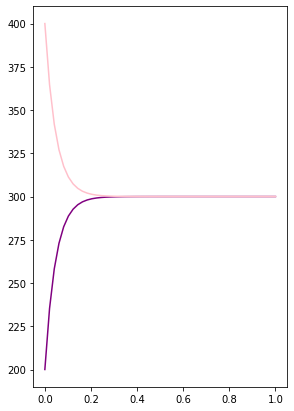

In [66]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(121)
ax.plot(time,T1, color='purple')
ax.plot(time,T2, color='pink')

Despues de calcular la derivada central de la función: $f(x) = e^{-x^{2}}$, Obtuvimos los datos de dicha derivada los cuales se van a graficar. 

In [26]:
file = 'DerivedData.dat.txt'
Data= np.loadtxt(file)

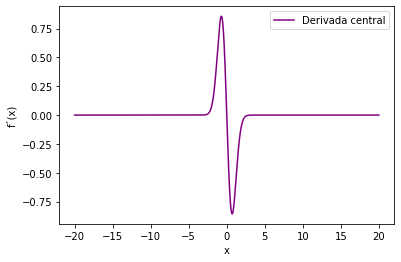

In [29]:
plt.plot(Data[:,0], Data[:,1], color="purple", label = "Derivada central")
plt.xlabel("x")
plt.ylabel("f´(x)")
plt.legend()